### IDS 561 Big Data Analytics Final Project

## Flight Delay Analysis

### - Sachin Chavan

In [2]:
# Importing necessary Libraries

import pandas as pd
import csv
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

In [4]:
#Importing the dataset
flight_data= pd.read_csv('C:/Users/Sachin Chavan/Downloads/2018.csv/2018.csv')
flight_data.head() #Reading the dataset

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flight_data.shape #Checking the shape of the dataset

(7213446, 28)

In [6]:
flight_data = flight_data[flight_data['ORIGIN'] == 'ORD'] #Filtering out O'hare Airport from 'ORIGIN' column

In [7]:
flight_data.head() #Checking the if the filter has been coorectly applied

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-01-01,UA,2422,ORD,OMA,2241,2244.0,3.0,15.0,2259.0,...,93.0,79.0,62.0,416.0,NaN,NaN,NaN,NaN,NaN,NaN
11,2018-01-01,UA,2416,ORD,CLE,2059,2300.0,121.0,24.0,2324.0,...,72.0,80.0,48.0,316.0,121.0,0.0,8.0,0.0,0.0,NaN
14,2018-01-01,UA,2413,ORD,BTV,2114,2230.0,76.0,14.0,2244.0,...,121.0,118.0,99.0,763.0,0.0,11.0,0.0,0.0,62.0,NaN
26,2018-01-01,UA,2399,ORD,MIA,1405,1402.0,-3.0,18.0,1420.0,...,185.0,184.0,157.0,1197.0,NaN,NaN,NaN,NaN,NaN,NaN


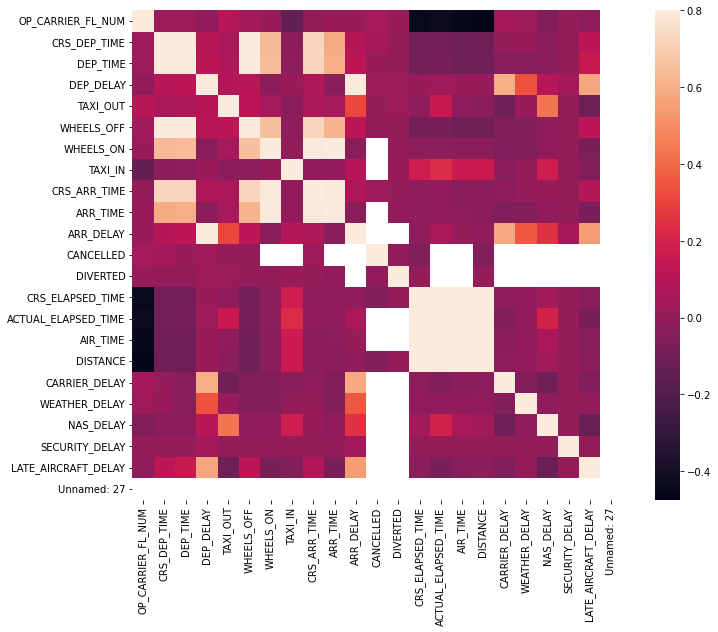

In [8]:
#Designing correlation matrix
corrmat = flight_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

From the above plot we can determine:

When the Flight is cancelled or diverted we can see that there is no data for Carrier Delay, Weather Dealy, NAS_Delay, Security_Delay, Late_Aircraft_Delay Groups etc. Which is correct as the flight never took off in first place or was diverted hence nulling out those parameters.
 

In [9]:
#Creating status as per delay time in minutes
for dataset in flight_data:
    flight_data.loc[flight_data['ARR_DELAY'] <= 15, 'Status'] = 0
    flight_data.loc[flight_data['ARR_DELAY'] >= 15, 'Status'] = 1
    flight_data.loc[flight_data['ARR_DELAY'] >= 60, 'Status'] = 2
    flight_data.loc[flight_data['DIVERTED'] == 1, 'Status'] = 3
    flight_data.loc[flight_data['CANCELLED'] == 1, 'Status'] = 4

In [10]:
Delayedflights = flight_data[(flight_data.Status >= 1) &(flight_data.Status < 3)] 

C:\Users\Sachin Chavan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


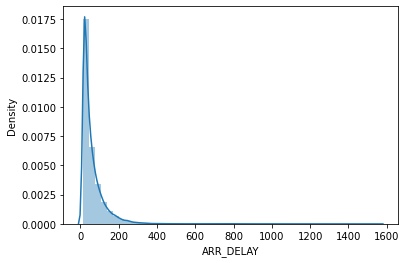

In [11]:
#Designing a histogram
sns.distplot(Delayedflights['ARR_DELAY'])
plt.show()

In [12]:
print("Skewness: %f" % Delayedflights['ARR_DELAY'].skew()) #Checking the skew

Skewness: 5.719330


#
It can be seen on the histogram and by the skewness indexe, that delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time.

C:\Users\Sachin Chavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


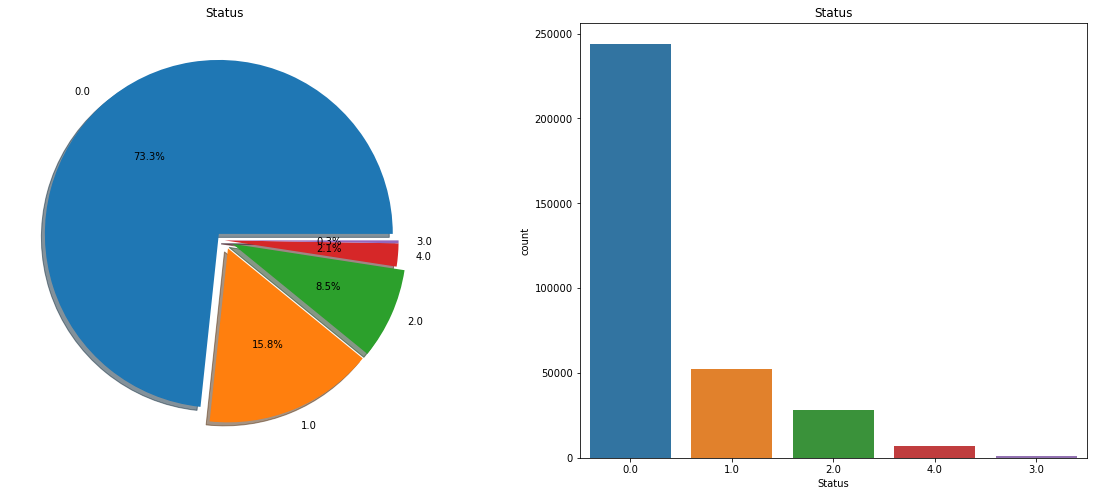

Status represents whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [14]:
#Visualizing 'status' as a pie-chart and bar graph
f,ax=plt.subplots(1,2,figsize=(20,8))
flight_data['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = flight_data['Status'].value_counts().index, data=flight_data,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

In 2018, almost 12.5% were delayed by more than 15 minutes. Only 6.2% of those flights were delayed by more than an hour.
On the other hand, just a 0.2% of flights were diverted and 1.6% were cancelled.


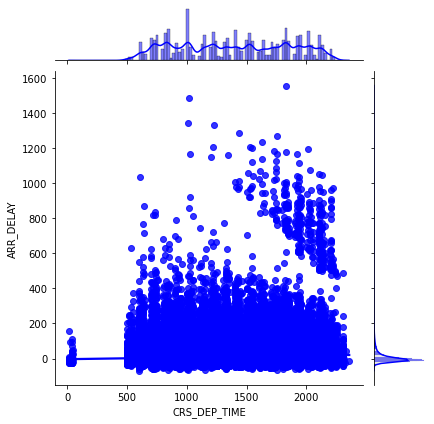

In [15]:
#Designing scatterplot
sns.jointplot(x='CRS_DEP_TIME',y='ARR_DELAY',data=flight_data,kind='reg', color='b',fit_reg = True)
plt.show()

Regarding the time of the day the take off was programmed, it can be seen in the higher part of the scatterplot how the delays are concentrated in an hourly manner, focused on the hour. As the day goes on, there are more and more delays, but as it's shown in the center of the scatterplot, the delayed flights get divided into two groups: one with longer delays and other with shorter. One likely interpretation is that the delays generated by previous flights either increase or decrease in each following trip

In [16]:
#Importing libraries & starting a spark session
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os
import networkx as nx
import sqlite3

spark = SparkSession.builder.appName('ml-project').getOrCreate()

In [17]:
!pip install pymongo

In [18]:
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

In [19]:
import pyspark
from pyspark.sql import SQLContext

In [20]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)

In [21]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os

In [22]:
#Rows and columns in our orginal dataset after applying ORD filter
flight_data.shape

(332953, 29)

In [25]:
#Dropping columns that we won't be using in our project
flight_data_new = flight_data.drop(['CANCELLATION_CODE', 'DIVERTED', 'CARRIER_DELAY', 'WEATHER_DELAY',
                                          'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
                                          'Unnamed: 27'], axis=1)

In [28]:
#New dataset after dropping few columns that are not needed 
flight_data_new.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Status
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,10.0,922,936.0,14.0,0.0,112.0,106.0,83.0,723.0,0.0
5,2018-01-01,UA,2422,ORD,OMA,2241,2244.0,3.0,15.0,2259.0,...,2.0,14,3.0,-11.0,0.0,93.0,79.0,62.0,416.0,0.0
11,2018-01-01,UA,2416,ORD,CLE,2059,2300.0,121.0,24.0,2324.0,...,8.0,2311,120.0,129.0,0.0,72.0,80.0,48.0,316.0,2.0
14,2018-01-01,UA,2413,ORD,BTV,2114,2230.0,76.0,14.0,2244.0,...,5.0,15,128.0,73.0,0.0,121.0,118.0,99.0,763.0,2.0
26,2018-01-01,UA,2399,ORD,MIA,1405,1402.0,-3.0,18.0,1420.0,...,9.0,1810,1806.0,-4.0,0.0,185.0,184.0,157.0,1197.0,0.0


EDA

In [30]:
#Getting the summary statistics of departure delay column
dep_max = flight_data_new['DEP_DELAY'].max()
dep_min = flight_data_new['DEP_DELAY'].min()
dep_mean = flight_data_new['DEP_DELAY'].mean()
dep_mode = flight_data_new['DEP_DELAY'].mode()
dep_sd = flight_data_new['DEP_DELAY'].std()
dep_md = flight_data_new['DEP_DELAY'].median()

#Getting the summary statistics of arrival column
arr_max = flight_data_new['ARR_DELAY'].max()
arr_min = flight_data_new['ARR_DELAY'].min()
arr_mean = flight_data_new['ARR_DELAY'].mean()
arr_mode = flight_data_new['ARR_DELAY'].mode()
arr_sd = flight_data_new['ARR_DELAY'].std()
arr_md = flight_data_new['ARR_DELAY'].median()

#Printing the calculated statistics 
print("Departure Delay")
print("Max: ", dep_max)
print("Min: ", dep_min)
print("SD: ", dep_sd)
print("Mean: ", dep_mean)
print("Median: ", dep_md)
print(" ")
print("Arrival Delay")
print("Max: ", arr_max)
print("Min: ", arr_min)
print("SD: ", arr_sd)
print("Mean: ", arr_mean)
print("Median: ", arr_md)

Departure Delay
Max:  1568.0
Min:  -42.0
SD:  46.90555324164041
Mean:  12.354664639007101
Median:  -2.0
 
Arrival Delay
Max:  1556.0
Min:  -69.0
SD:  49.854278990672064
Mean:  10.381537921715765
Median:  -3.0


In [31]:
#Compute and display the summary statistics for the entire Python dataframe
flight_data_new.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Status
count,332953.000000,332953.000000,326224.000000,326156.000000,325894.000000,325894.000000,325626.000000,325626.000000,332953.000000,325626.000000,324893.000000,332953.000000,332953.000000,324908.000000,324908.000000,332953.000000,332938.000000
mean,2670.081243,1382.376633,1390.183383,12.354665,22.471003,1425.536006,1542.884619,6.651465,1569.632918,1541.528124,10.381538,0.021432,135.236397,133.882899,104.777432,738.906696,0.421355
std,1602.388395,469.717392,482.912657,46.905553,11.681441,485.362136,530.204125,5.128840,506.325183,538.515243,49.854279,0.144821,66.623876,67.086901,65.225680,508.567381,0.828850
min,18.000000,10.000000,1.000000,-42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-69.000000,0.000000,-99.000000,27.000000,9.000000,67.000000,0.000000
25%,1237.000000,1000.000000,957.000000,-5.000000,15.000000,1018.000000,1143.000000,4.000000,1154.000000,1146.000000,-12.000000,0.000000,86.000000,85.000000,57.000000,334.000000,0.000000
50%,2764.000000,1400.000000,1358.000000,-2.000000,19.000000,1422.000000,1545.000000,5.000000,1556.000000,1546.000000,-3.000000,0.000000,120.000000,118.000000,89.000000,621.000000,0.000000
75%,3717.000000,1815.000000,1823.000000,8.000000,26.000000,1849.000000,2017.000000,8.000000,2028.000000,2017.000000,14.000000,0.000000,161.000000,162.000000,130.000000,925.000000,1.000000
max,6122.000000,2359.000000,2400.000000,1568.000000,177.000000,2400.000000,2400.000000,196.000000,2400.000000,2400.000000,1556.000000,1.000000,575.000000,624.000000,557.000000,4243.000000,4.000000


In [32]:
flight_data_new.columns #Checking column names in dataframe

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'Status'],
      dtype='object')

In [33]:
flight_data_new.info() #Getting additional information on columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332953 entries, 4 to 7213406
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              332953 non-null  object 
 1   OP_CARRIER           332953 non-null  object 
 2   OP_CARRIER_FL_NUM    332953 non-null  int64  
 3   ORIGIN               332953 non-null  object 
 4   DEST                 332953 non-null  object 
 5   CRS_DEP_TIME         332953 non-null  int64  
 6   DEP_TIME             326224 non-null  float64
 7   DEP_DELAY            326156 non-null  float64
 8   TAXI_OUT             325894 non-null  float64
 9   WHEELS_OFF           325894 non-null  float64
 10  WHEELS_ON            325626 non-null  float64
 11  TAXI_IN              325626 non-null  float64
 12  CRS_ARR_TIME         332953 non-null  int64  
 13  ARR_TIME             325626 non-null  float64
 14  ARR_DELAY            324893 non-null  float64
 15  CANCELLED       

In [34]:
flight_data_new.isnull().value_counts()

FL_DATE  OP_CARRIER  OP_CARRIER_FL_NUM  ORIGIN  DEST   CRS_DEP_TIME  DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  CRS_ARR_TIME  ARR_TIME  ARR_DELAY  CANCELLED  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  Status
False    False       False              False   False  False         False     False      False     False       False      False    False         False     False      False      False             False                False     False     False     324838
                                                                     True      True       True      True        True       True     False         True      True       False      False             True                 True      False     False       6729
                                                                     False     False      False     False       False      False    False         False     True       False      False             True                 True      False     False      

In [44]:
#Function that classifies delay into 3 time intervals of 30 mins, 1 hour & 3 hours to understand delay distribution
def classify(num):
    if (num < 0):
        if (num < -30):
            return ('Early: > 30 mins') 
        else:
            return ('Early: < 30 mins')
    else:
        if (num < 60):
            return ('Late: < 1 hour')
        elif (num < 180):
            return ('Late: < 3 hours')
        else:
            return ('Late: > 3 hours')


#Creating a new column 
group_arr_df = flight_data_new[['ORIGIN', 'DEST', 'ARR_DELAY']]
group_arr_df['Delay Amount'] = group_arr_df['ARR_DELAY'].apply(lambda x: classify(x))

C:\Users\SACHIN~1\AppData\Local\Temp/ipykernel_22800/4179891639.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_arr_df['Delay Amount'] = group_arr_df['ARR_DELAY'].apply(lambda x: classify(x))


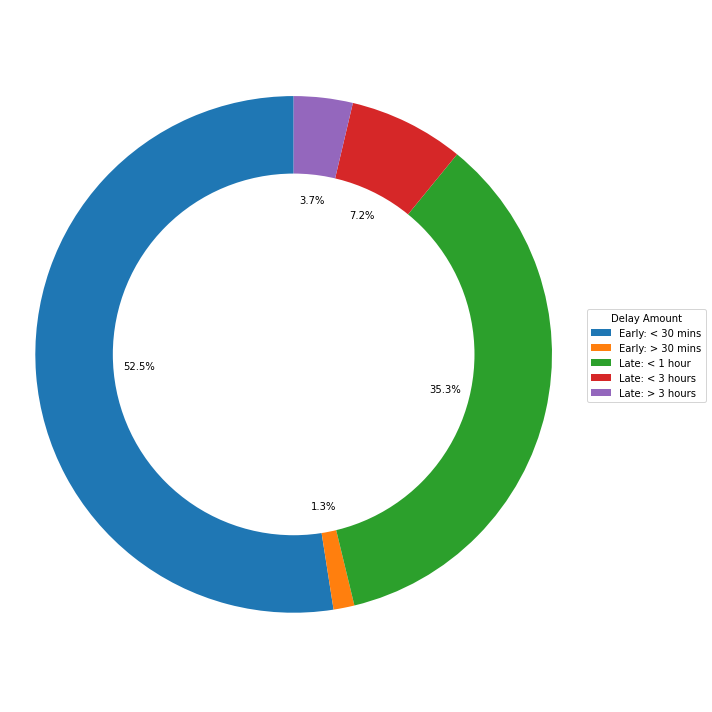

In [46]:
#Designing the Pie Chart
import matplotlib.pyplot as plt

group_arr_count = pd.DataFrame({'Count' : group_arr_df.groupby([ "Delay Amount"] ).size()}).reset_index()

total = group_arr_count['Count'].sum()
group_arr_count['Percent'] = group_arr_count['Count'].apply(lambda x: (x / total) * 100) 
group_arr_count.sort_values('Count', ascending=True)


labels = group_arr_count['Delay Amount']
sizes = group_arr_count['Percent']
explode = (0.05,0.05,0.05,0.05, 0.5)
fig1, ax1 = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.legend(wedges, labels,
          title="Delay Amount",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


ax1.axis('equal')  
plt.tight_layout()

plt.setp(texts, size=8, weight="bold")
plt.show()

In [47]:
#Grouping by origin-destination 
OD_pairs = pd.DataFrame({'Count' : flight_data_new.groupby([ "ORIGIN", "DEST"] ).size()}).reset_index()
top_OD_pairs = OD_pairs.sort_values('Count', ascending=False).head(10)
top_OD_pairs

,ORIGIN,DEST,Count
94,ORD,LGA,15281
91,ORD,LAX,8384
47,ORD,DCA,8090
7,ORD,ATL,7619
49,ORD,DFW,7531
115,ORD,MSP,7491
21,ORD,BOS,7390
149,ORD,SFO,7013
52,ORD,DTW,6713
48,ORD,DEN,6427


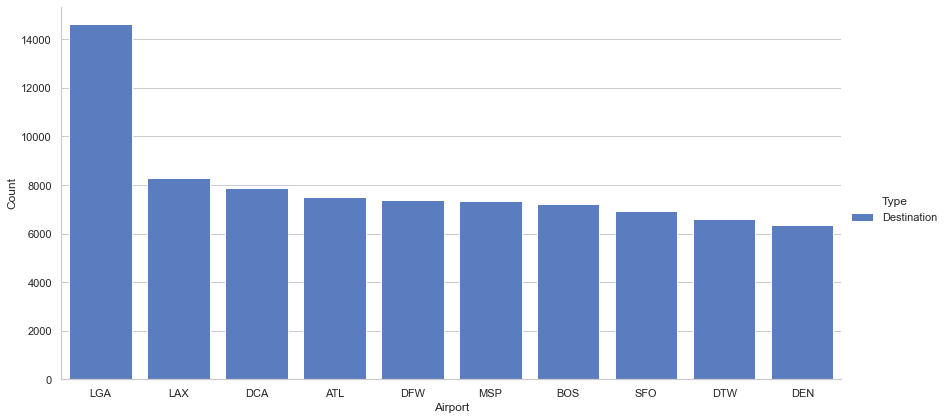

In [88]:
#Group by Origin and Group by Destination
top_origins = pd.DataFrame({'Count' : flight_data_new.groupby(["ORIGIN"] ).size()}).reset_index().sort_values('Count', ascending=False).head(10)
top_dest = pd.DataFrame({'Count' : flight_data_new.groupby(["DEST"] ).size()}).reset_index().sort_values('Count', ascending=False).head(10)


#Merging on airport so that for each airport we see how many incoming/outgoing flights there are
top_airports = pd.merge(top_origins, top_dest, how='inner', left_on='ORIGIN', right_on='DEST',)
top_airports = top_airports.drop('DEST', axis=1)
top_airports = top_airports.rename(columns={'Count_x': 'Origin_Count', 'Count_y': 'Dest_Count'})
top_airports['Difference'] = top_airports['Origin_Count'] - top_airports['Dest_Count']

#Renaming Columns
top_dest = top_dest.rename(columns={'DEST': 'Airport'})

#Defining if origin or destination
top_dest['Type'] = 'Destination'

airports_df = pd.concat([top_origins, top_dest])

#Plotting bar plot
import seaborn as sns

sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Airport", y="Count", hue="Type", data=airports_df,
                height=6, kind="bar", palette="muted", aspect=2)
g.set_ylabels("Count")

In [52]:
#Getting average delay for that flight by grouping 'ORIGIN' & 'DEST'
OD_pairs_delay = pd.DataFrame({'avg_delay' : flight_data_new.groupby([ "ORIGIN", "DEST"] )['ARR_DELAY'].mean(), 
                               'count' : flight_data_new.groupby([ "ORIGIN", "DEST"] ).size()}).reset_index()
OD_pairs_delay_filter = OD_pairs_delay[OD_pairs_delay['count'] >= 48]
OD_pairs_delay_filter.sort_values('avg_delay', ascending=False).head(20)
OD_pairs_delay_filter.sort_values('avg_delay', ascending=True).head(20)

,ORIGIN,DEST,avg_delay,count
29,ORD,CGI,-5.023102,313
59,ORD,EYW,-3.743363,231
73,ORD,GTF,-1.842105,76
119,ORD,OAK,-0.652941,171
118,ORD,MYR,1.452632,289
82,ORD,ILM,1.604651,88
20,ORD,BOI,1.714429,1005
63,ORD,FCA,2.371795,157
159,ORD,SRQ,2.461039,465
27,ORD,CAE,2.629870,155


In [61]:
#Calculating average delay for each airline
airline_delay_df = pd.DataFrame({'avg_delay' : flight_data_new.groupby([ "OP_CARRIER"] )['ARR_DELAY'].mean()}).reset_index()
airline_delay_df.sort_values('avg_delay', ascending=False).head(20)

,OP_CARRIER,avg_delay
3,B6,27.831651
6,F9,20.975231
9,OH,16.184260
10,OO,14.552036
5,EV,12.984772
0,9E,12.616667
1,AA,10.802101
4,DL,9.114421
8,NK,8.885193
11,UA,8.770952


In [54]:
flight_data_new = pd.merge(flight_data_new, airline_delay_df, how='inner', on='OP_CARRIER')

In [55]:
#Extracting week day by converting to string
flight_data_new['FL_DATE']= pd.to_datetime(flight_data_new['FL_DATE'])
flight_data_new['flight_weekday']= flight_data_new['FL_DATE'].apply(lambda x: x.weekday() + 1)

In [56]:
#Calculating the correlation
correlation_data =  flight_data_new
corr = correlation_data.corr()   

C:\Users\SACHIN~1\AppData\Local\Temp/ipykernel_22800/3746354249.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

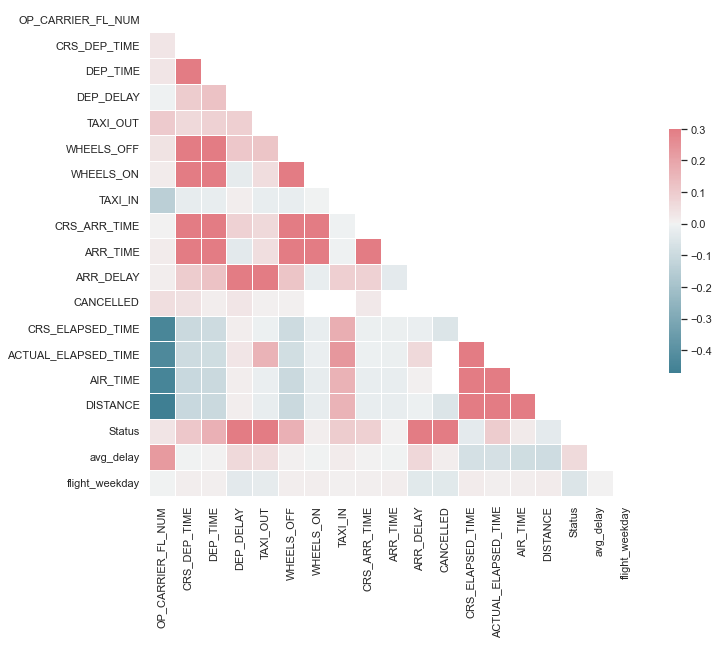

In [59]:
#Plotting Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [62]:
import datetime

#Extracting year and the month
correlation_data['year_month'] = correlation_data['FL_DATE'].values.astype('datetime64[M]')

#Calculating month-wise delay
grouped_date_df = pd.DataFrame({'count' : correlation_data.groupby(["year_month"] ).size() }).reset_index()
grouped_date_df.sort_values('count', ascending=True).head(20)

,year_month,count
1,2018-02-01,23353
0,2018-01-01,25680
3,2018-04-01,26435
2,2018-03-01,26730
10,2018-11-01,27362
11,2018-12-01,27639
8,2018-09-01,28257
4,2018-05-01,28338
5,2018-06-01,29175
9,2018-10-01,29626


<AxesSubplot:xlabel='year_month', ylabel='count'>

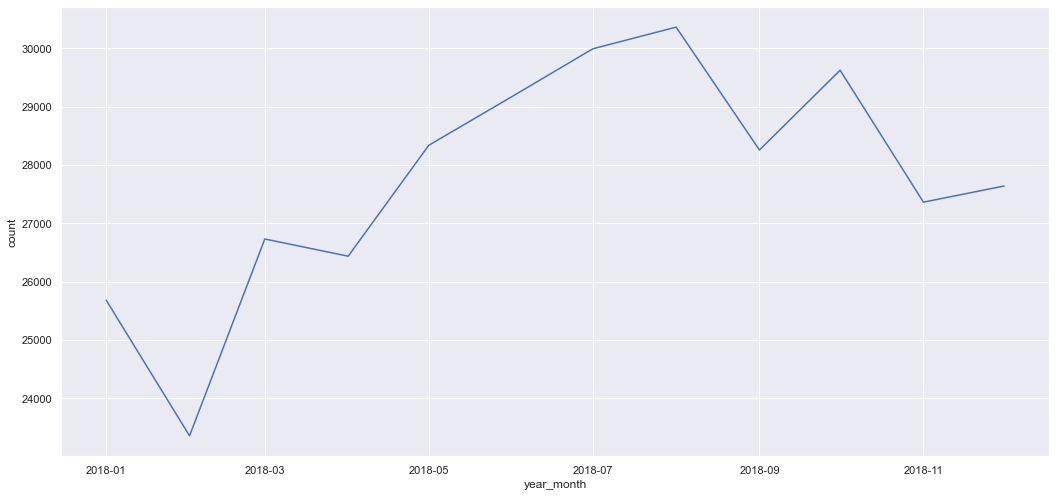

In [64]:
#Plotting month-wise delay as a line graph
import seaborn as sns
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(17.7,8.27)})

sns.lineplot(x="year_month", y="count",
             data=grouped_date_df)

In [65]:
#Extracting data for the three major airline of US i.e, AA, DL, UA
grouped_date_airline_df = pd.DataFrame({'count' : correlation_data.groupby(["year_month", "OP_CARRIER"] ).size() }).reset_index()
grouped_date_airline_df.sort_values('count', ascending=True).head(20)
grouped_date_airline_df = grouped_date_airline_df[grouped_date_airline_df['OP_CARRIER'].isin(['AA', 'DL', 'UA', 'WN'])]
grouped_date_airline_df

,year_month,OP_CARRIER,count
1,2018-01-01,AA,5194
4,2018-01-01,DL,545
11,2018-01-01,UA,5168
15,2018-02-01,AA,4648
18,2018-02-01,DL,496
25,2018-02-01,UA,4814
29,2018-03-01,AA,5212
32,2018-03-01,DL,617
39,2018-03-01,UA,5652
43,2018-04-01,AA,4931


<AxesSubplot:xlabel='year_month', ylabel='count'>

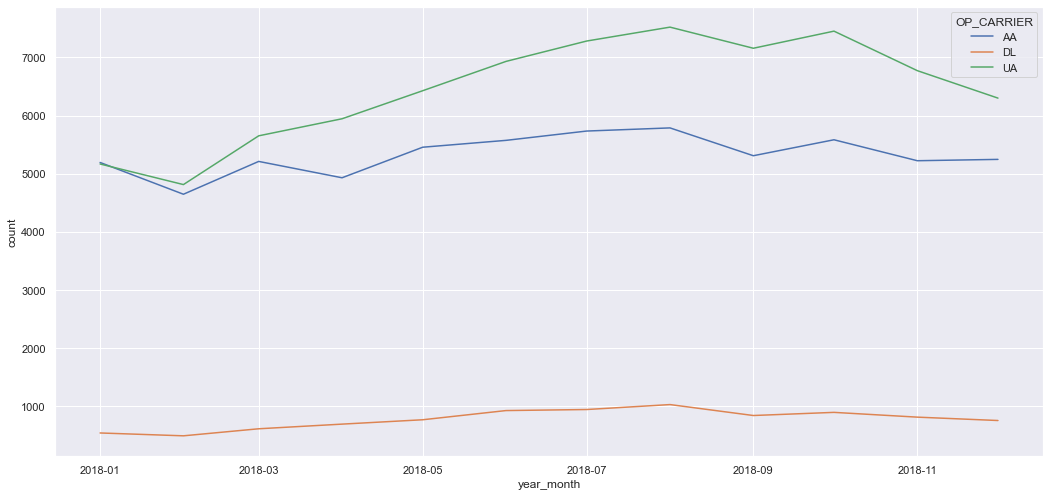

In [66]:
#Plotting a line graph
import seaborn as sns
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(17.7,8.27)})
sns.lineplot(x="year_month", y="count", hue='OP_CARRIER',
             data=grouped_date_airline_df)

In [67]:
#One hot encoding method involves transforming categorical variables into a format that can be supplied to ML algorithms to help them anticipate outcomes more accurately.
#Performing one hot-encoding
flight_data_new = pd.get_dummies(flight_data_new, columns=['flight_weekday'])
flight_data_new

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,Status,avg_delay,year_month,flight_weekday_1,flight_weekday_2,flight_weekday_3,flight_weekday_4,flight_weekday_5,flight_weekday_6,flight_weekday_7
0,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,0.0,8.770952,2018-01-01,1,0,0,0,0,0,0
1,2018-01-01,UA,2422,ORD,OMA,2241,2244.0,3.0,15.0,2259.0,...,0.0,8.770952,2018-01-01,1,0,0,0,0,0,0
2,2018-01-01,UA,2416,ORD,CLE,2059,2300.0,121.0,24.0,2324.0,...,2.0,8.770952,2018-01-01,1,0,0,0,0,0,0
3,2018-01-01,UA,2413,ORD,BTV,2114,2230.0,76.0,14.0,2244.0,...,2.0,8.770952,2018-01-01,1,0,0,0,0,0,0
4,2018-01-01,UA,2399,ORD,MIA,1405,1402.0,-3.0,18.0,1420.0,...,0.0,8.770952,2018-01-01,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332948,2018-12-31,DL,868,ORD,ATL,545,543.0,-2.0,15.0,558.0,...,0.0,9.114421,2018-12-01,1,0,0,0,0,0,0
332949,2018-12-31,DL,888,ORD,MSP,1752,1746.0,-6.0,11.0,1757.0,...,0.0,9.114421,2018-12-01,1,0,0,0,0,0,0
332950,2018-12-31,DL,998,ORD,SEA,1515,1507.0,-8.0,24.0,1531.0,...,0.0,9.114421,2018-12-01,1,0,0,0,0,0,0
332951,2018-12-31,DL,1275,ORD,ATL,1507,1503.0,-4.0,30.0,1533.0,...,0.0,9.114421,2018-12-01,1,0,0,0,0,0,0


In [69]:
#Dropping non-numeric columns
flight_data_model = flight_data_new.drop(['FL_DATE', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
                                    'CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME',
                                    'CANCELLED'], axis=1).dropna()
flight_data_model.head()

,OP_CARRIER,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Status,avg_delay,year_month,flight_weekday_1,flight_weekday_2,flight_weekday_3,flight_weekday_4,flight_weekday_5,flight_weekday_6,flight_weekday_7
0,UA,20.0,13.0,10.0,936.0,14.0,112.0,106.0,83.0,723.0,0.0,8.770952,2018-01-01,1,0,0,0,0,0,0
1,UA,3.0,15.0,2.0,3.0,-11.0,93.0,79.0,62.0,416.0,0.0,8.770952,2018-01-01,1,0,0,0,0,0,0
2,UA,121.0,24.0,8.0,120.0,129.0,72.0,80.0,48.0,316.0,2.0,8.770952,2018-01-01,1,0,0,0,0,0,0
3,UA,76.0,14.0,5.0,128.0,73.0,121.0,118.0,99.0,763.0,2.0,8.770952,2018-01-01,1,0,0,0,0,0,0
4,UA,-3.0,18.0,9.0,1806.0,-4.0,185.0,184.0,157.0,1197.0,0.0,8.770952,2018-01-01,1,0,0,0,0,0,0


In [70]:
#Converting to csv
flight_data_model.to_csv('flight_data.csv')

In [72]:
#Reading as a spark dataframe
flights_spark = spark.read.csv('flight_data.csv', header = True, inferSchema = True)
flights_spark.show()

+---+----------+---------+--------+-------+--------+---------+----------------+-------------------+--------+--------+------+-----------------+-------------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|_c0|OP_CARRIER|DEP_DELAY|TAXI_OUT|TAXI_IN|ARR_TIME|ARR_DELAY|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|Status|        avg_delay|         year_month|flight_weekday_1|flight_weekday_2|flight_weekday_3|flight_weekday_4|flight_weekday_5|flight_weekday_6|flight_weekday_7|
+---+----------+---------+--------+-------+--------+---------+----------------+-------------------+--------+--------+------+-----------------+-------------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|  0|        UA|     20.0|    13.0|   10.0|   936.0|     14.0|           112.0|              106.0|    83.0|   723.0|   0.0|8.770951546688282|2018-01-01 0

### Data Modeling:


#### Baseline Model

In [73]:
from pyspark.ml.evaluation import RegressionEvaluator

#Predicting using avg_delay column only
eval_reg_baseline_r2 = RegressionEvaluator(labelCol="ARR_DELAY", predictionCol="avg_delay", metricName="r2")
eval_reg_baseline_rmse = RegressionEvaluator(labelCol="ARR_DELAY", predictionCol="avg_delay", metricName="rmse")

print("R Squared (R2) = %g" % eval_reg_baseline_r2.evaluate(flights_spark))
print("R Squared (RMSE) = %g" % eval_reg_baseline_rmse.evaluate(flights_spark))

R Squared (R2) = 0.00463019
R Squared (RMSE) = 49.742


In [74]:
# Creating a vector assembler

feature_columns = ['DEP_DELAY', 'TAXI_OUT', 'CRS_ELAPSED_TIME', 'DISTANCE', 
                   'flight_weekday_1', 'flight_weekday_2', 'flight_weekday_3', 
                   'flight_weekday_4', 'flight_weekday_5', 'flight_weekday_6',
                   'flight_weekday_7']
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")

flights_sparkv = assembler.transform(flights_spark)
flights_sparkv = flights_sparkv.select(['features', 'ARR_DELAY'])
flights_sparkv.show()

+--------------------+---------+
|            features|ARR_DELAY|
+--------------------+---------+
|(11,[0,1,2,3,4],[...|     14.0|
|(11,[0,1,2,3,4],[...|    -11.0|
|(11,[0,1,2,3,4],[...|    129.0|
|(11,[0,1,2,3,4],[...|     73.0|
|(11,[0,1,2,3,4],[...|     -4.0|
|(11,[0,1,2,3,4],[...|     -9.0|
|(11,[0,1,2,3,4],[...|    -19.0|
|(11,[0,1,2,3,4],[...|     -4.0|
|(11,[0,1,2,3,4],[...|     26.0|
|(11,[0,1,2,3,4],[...|      0.0|
|(11,[0,1,2,3,4],[...|      0.0|
|(11,[0,1,2,3,4],[...|     -5.0|
|(11,[1,2,3,4],[20...|    -11.0|
|(11,[0,1,2,3,4],[...|     72.0|
|(11,[0,1,2,3,4],[...|     31.0|
|(11,[0,1,2,3,4],[...|     -8.0|
|(11,[0,1,2,3,4],[...|     10.0|
|(11,[0,1,2,3,4],[...|      1.0|
|(11,[0,1,2,3,4],[...|     12.0|
|(11,[0,1,2,3,4],[...|    -18.0|
+--------------------+---------+
only showing top 20 rows



In [76]:
#Making a 80%-20% split
train, test = flights_sparkv.randomSplit([0.8, 0.2])

#### Linear Regression without Regularization

In [77]:
from pyspark.ml.regression import LinearRegression

#Creating a linear regression model
lreg_v1 = LinearRegression(featuresCol="features", labelCol="ARR_DELAY")
lr_model_v1 = lreg_v1.fit(train)

In [78]:
trainingSummary_v1 = lr_model_v1.summary
#Calculating RMSE & R2
print("RMSE: %f" % trainingSummary_v1.rootMeanSquaredError)
print("r2: %f" % trainingSummary_v1.r2)

RMSE: 9.510733
r2: 0.963668


In [79]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions_v1 = lr_model_v1.transform(test)
eval_reg = RegressionEvaluator(labelCol="ARR_DELAY", metricName="r2")
test_result_v1 = lr_model_v1.evaluate(test)

print("R Squared (R2) on test data = %g" % eval_reg.evaluate(predictions_v1))
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result_v1.rootMeanSquaredError)

R Squared (R2) on test data = 0.963122
Root Mean Squared Error (RMSE) on test data = 9.54488


#### Liner Regression with Regualrization: Below is the code where we used a CrossValidator to tune the hyperparameters.

In [80]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression

lreg_v2 = LinearRegression(labelCol='ARR_DELAY', featuresCol='features')
pipeline = Pipeline(stages=[lreg_v2])

paramGrid = ParamGridBuilder()\
    .addGrid(lreg_v2.regParam, [0.01, 0.1, 0.2]) \
    .addGrid(lreg_v2.fitIntercept, [True])\
    .addGrid(lreg_v2.elasticNetParam, [0.0, 0.1, 0.2, 0.5])\
    .addGrid(lreg_v2.maxIter, [1, 3, 5])\
    .build()

cross_val = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid,
                           evaluator=RegressionEvaluator(labelCol="ARR_DELAY"), numFolds=3)

cross_val
lr_model_v2 = cross_val.fit(train)
bestModel = lr_model_v2.bestModel

#Predicting the test set 
predictions_v2 = lr_model_v2.transform(test)
eval_reg_2 = RegressionEvaluator(labelCol="ARR_DELAY", metricName="r2")

In [82]:
print("Best Param (regParam): %g" % lreg_v2._java_obj.getRegParam())

print("Best Param (MaxIter):  %g" %lreg_v2._java_obj.getMaxIter())

print("Best Param (elasticNetParam):  %g" %lreg_v2._java_obj.getElasticNetParam())

Best Param (regParam): 0
Best Param (MaxIter):  100
Best Param (elasticNetParam):  0


In [81]:
#Importing necessary libraries
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [82]:
from sklearn.model_selection import train_test_split


flight_data_new = flight_data_new.dropna()[:1000000]

label = flight_data_new['ARR_DELAY']
features = flight_data_new[['DEP_DELAY', 'TAXI_OUT', 'CRS_ELAPSED_TIME', 'DISTANCE', 
                   'flight_weekday_1', 'flight_weekday_2', 'flight_weekday_3', 
                   'flight_weekday_4', 'flight_weekday_5', 'flight_weekday_6',
                   'flight_weekday_7']]

#Designing test and train data sets
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.20)

### XGBoost Regressor

In [83]:
!pip install xgboost

In [84]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

model = xgb.XGBRegressor()

param = {'colsample_bytree': [1], 
         'gamma': [1.5], 
         'learning_rate': [0.5], 
         'max_depth': [8], 
         'min_child_weight': [3], 
         'n_estimators': [800],
         'silent': [1], 
         'subsample': [0.8]
         }

score_fun = make_scorer(mean_squared_error, greater_is_better = False)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param, cv = 2,
                        n_jobs = 5,
                        verbose=True,
                        scoring = score_fun)

# Fit the grid search to the data
%time res = grid_search.fit(x_train, y_train)

best_parameters_xgb = res.best_params_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[18:04:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

Wall time: 3min 28s


In [85]:
print(res.best_score_)
print(res.best_params_)

-116.65720557780548
{'colsample_bytree': 1, 'gamma': 1.5, 'learning_rate': 0.5, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 800, 'silent': 1, 'subsample': 0.8}


In [86]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math


%time preds = res.best_estimator_.predict(x_test)
print("R2 =", r2_score(y_test, preds)) 
print("RMSE =", math.sqrt(mean_squared_error(y_test, preds))) 

Wall time: 352 ms
R2 = 0.9576048507249062
RMSE = 10.19450051540039


#### The XGBoost Regressor consistently achieves a slightly higher R2 score. Perhaps with more time and tuning of hyperparameters, it could be possible for the model to be slightly more accurate. Thus XGBoost model will be best suited in this particular case.

### ---------------------------------------------------------------- END OF CODE -----------------------------------------------------------------------------